<Center><h1> Neural Network on Titanic Data </h1><Center>
 <img src="images/img1.jpg" width=700 height=500 />


# Table of content

1. [Load Packages](#id1)
2. [Load Dataset](#id2)
3. [Data Preprocessing](#id3)<br>
    3.1 [Data Description](#id301)<br>
    3.2 [Pandas profiling](#id302)<br>
    3.3 [Handle missing data](#id302)<br>
4. [Data Customization](#id4)
5. [Data Standardization](#id5)
6. [Data Standardization](#id6)


<a id='id1'></a>
# 2. Load Packages


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
%matplotlib inline

<a id='id2'></a>
# Load Dataset

In [70]:
titanic_data =  pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv')

In [71]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Observation__
- dataset contains **5 categorical** and **7 numerical** columnsm

<a id='id4'></a>
# 3. Data Preprocessing

### 3.1 Data Description

In [73]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__observation__
- **Fare** and **Age** can not be zero

### 3.2 Pandas profiling

In [74]:
from pandas_profiling import ProfileReport


In [75]:
# profile = ProfileReport(titanic_data, title='Titanic pandas profiling', explorative=True)
# profile.to_file("titanice_data_profiling.html")

### 3.3 Handing missing values

In [82]:
titanic_df = titanic_data.copy()

In [83]:
titanic_df.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

__Observation__
- Null values are available **Age** **Cabin** and Embarked columns

#### Delete Cabin column as more then **50% values are null**.

In [84]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [86]:
# fill null values with median in Age columns
titanic_df['Age'] = titanic_df.Age.fillna(titanic_df.Age.mean())

In [89]:
titanic_df["Embarked"] = titanic_df.Embarked.fillna(titanic_df.Embarked.mode()[0])


In [90]:
titanic_df.isnull().sum().sort_values()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- There is no null values available in the database

## 4. Data Customization

#### Create new column family by adding sibsp and parch

In [91]:
titanic_df['familysize'] = titanic_df['SibSp'] +  titanic_df['Parch'] + 1

#### Segmentation of sex column based on age

In [93]:
titanic_df['sex'] = titanic_df.apply(lambda x: 'child' if x['Age']< 15 else x['Sex'], axis=1)

In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familysize,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


* Dropping columns **Name** , **Ticket** , **Sex** , **SibSp** and **Parch**

In [96]:
titanic_df = titanic_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Sex'], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,familysize,sex
0,1,0,3,22.0,7.2500,S,2,male
1,2,1,1,38.0,71.2833,C,2,female
2,3,1,3,26.0,7.9250,S,1,female
3,4,1,1,35.0,53.1000,S,2,female
4,5,0,3,35.0,8.0500,S,1,male


#### Convert categorical data into numerical to create the model

In [98]:
df = pd.get_dummies(titanic_df, columns = ['Embarked', 'sex'], drop_first=True)

In [99]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,familysize,Embarked_Q,Embarked_S,sex_female,sex_male
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,0,0,1,0
2,3,1,3,26.0,7.9250,1,0,1,1,0
3,4,1,1,35.0,53.1000,2,0,1,1,0
4,5,0,3,35.0,8.0500,1,0,1,0,1


* **PassengerId** is not relavent to needs to drop it as well

In [101]:
df.drop('PassengerId', axis=1, inplace=True)

#### Correlation matrix

In [103]:
corr = df.corr()

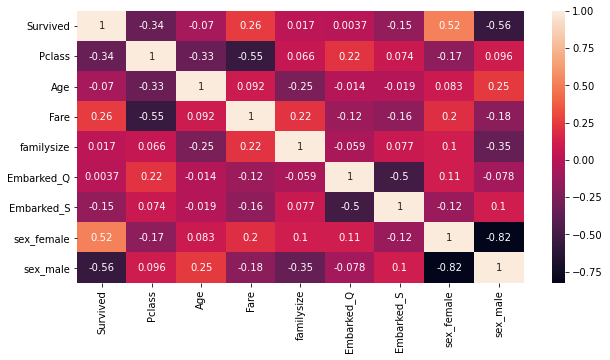

In [110]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

__observation__

* There is a strong correlation between sex_femal and survived